# Practico 3 y 4 (parte 3)
## Inclusion de librerias y módulos

In [1]:
#Librerías 
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import pandas.util.testing as tm
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from scipy import stats

# Para dividir el dataset en train  y test
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Algoritmo del Árbol de Decisión
from sklearn.tree import (DecisionTreeClassifier, plot_tree)

# Validación Cruzada 
from sklearn.model_selection import GridSearchCV

# Para calcular métricas
# from sklearn.metrics import (accuracy_score, precision_score, recall_score,
#                              f1_score, confusion_matrix, classification_report,
#                             roc_curve, roc_auc_score, precision_recall_curve, plot_confusion_matrix) 

# Para la Normalización 
from sklearn.preprocessing import StandardScaler

#Colors
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'

# Utiles
from utiles import basic_metrics
from utiles import plot_cm
from utiles import plot_roc_pr

## **Carga de datos**

El archivo `yup_curated_data.csv` se genera a partir del archivo `yup_messages_preprocessed.csv` y `datadump-20150801-20171219.csv` y se cura para se utilizado en el presente notebook.

In [2]:
filename = 'yup_curated_data.csv'  
datos_curados = pd.read_csv(os.path.join('..', 'dataset', filename))

## **División y normalización de los datos**
1. El conjunto de datos es dividido en datos de entrada o alimentación y en la referencia o target al cual debe apuntar el clasificador al momento de predecir.

1. Se divide nuevamente al conjunto de datos en datos de entrenamiento o train y  datos de evaluación o test, cada uno de ellos con su correspondiente referencia o target.

1. Los conjuntos de datos de train y test, son normalizados para favorecer el proceso de convergencia del modelo. Se remueve la media y se normaliza la varianza a valor unitario con el método StandardScaler

In [3]:
#1. División entre datos de entrada y referencia o target
X, y = datos_curados.iloc[:, :-1], datos_curados.student_rating_cat

#2. División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#3. Normalización de los datos para mejorar la convergencia del modelo
escalado = StandardScaler()
escalado.fit(X_train)
X_train = escalado.transform(X_train)
X_test  = escalado.transform(X_test)  

## **Ejercicio 3.1: Árboles de Decisión**

Se crea el objeto del modelo y se imprimen los parametros por defecto que posee el modelo. Se fija la semilla para hacer reproducible el experimento.

In [4]:
arbol_decision = DecisionTreeClassifier(random_state = 42) # para que coincida con el random_state elegido para SGD

print('Parámetros utilizados: \n', np.array(list(arbol_decision.get_params(deep=False).items())))

Parámetros utilizados: 
 [['ccp_alpha' 0.0]
 ['class_weight' None]
 ['criterion' 'gini']
 ['max_depth' None]
 ['max_features' None]
 ['max_leaf_nodes' None]
 ['min_impurity_decrease' 0.0]
 ['min_impurity_split' None]
 ['min_samples_leaf' 1]
 ['min_samples_split' 2]
 ['min_weight_fraction_leaf' 0.0]
 ['presort' 'deprecated']
 ['random_state' 42]
 ['splitter' 'best']]


### Entrenamiento

El modelo es entrenado con los parametros que posee la implementación por defecto. El mencionado proceso consume el conjunto de datos de entrenamiento y su correspondiente referencia.

In [5]:
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Predicción con el conjuto de datos de entrenamient y test

Se lleva a cabo el proceso de prediccion tomando como entrada al modelo

1. El conjunto de datos de entrenamiento
2. El conjunto de datos de test

In [6]:
#1. Predicción con el conjunto de datos de entrenamiento
y_train_pred_arbolD = arbol_decision.predict(X_train)
y_train_pred_arbolDp = arbol_decision.predict_proba(X_train)

#1. Predicción con el conjunto de datos de test
y_test_pred_arbolD  = arbol_decision.predict(X_test)
y_test_pred_arbolDp = arbol_decision.predict_proba(X_test)

Accuracy con train

In [7]:
print ('Accuracy: %d ' % ((np.sum(y_train == y_train_pred_arbolD))/float(y_train.size)*100))

Accuracy: 99 


Accuracy con test

In [8]:
print ('Accuracy: %d ' % ((np.sum(y_test == y_test_pred_arbolD))/float(y_test.size)*100))

Accuracy: 73 


**Valores máximos de profundidad y cantidad de hojas máxima**

In [9]:
print('Profundidad máxima del árbol:', arbol_decision.get_depth())
print('Cantidad máxima de hojas:', arbol_decision.get_n_leaves())

Profundidad máxima del árbol: 46
Cantidad máxima de hojas: 2581


**Gráficos**

La figura del árbol nos permite apreciar la estructura de decisiones que ha adoptdo al menos en las primeras cuatro capas. 

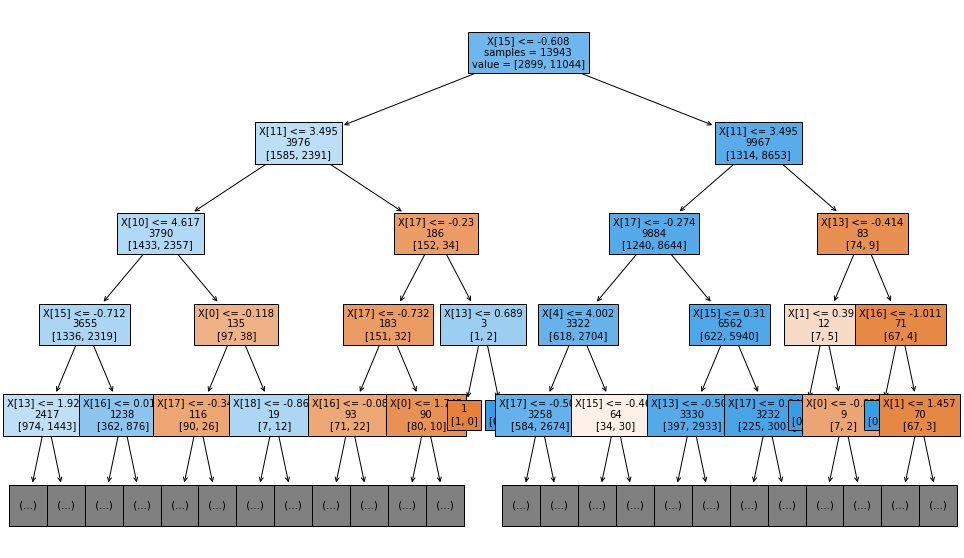

In [10]:
plt.figure(figsize=(17,10))
plot_tree(arbol_decision, impurity=False, max_depth= 4, fontsize=10, filled=True, label='root')  #filled=True,
plt.show()

#### Se imprimen las métricas de desempeño

* Accuracy
* Precision
* Recall
* F1-score
* Matriz de confusión

In [11]:
print('************************************************************')
ad_train = basic_metrics(y_train, y_train_pred_arbolD, 'Train')
print('------------------------------------------------------------')
ad_test = basic_metrics(y_test, y_test_pred_arbolD, 'Test')
print('------------------------------------------------------------')

************************************************************
Métricas Train:
              precision    recall  f1-score   support

           0      0.997     0.999     0.998      2899
           1      1.000     0.999     0.999     11044

    accuracy                          0.999     13943
   macro avg      0.998     0.999     0.999     13943
weighted avg      0.999     0.999     0.999     13943

Confusion Matrix: 
[[ 2895     4]
 [    8 11036]]
------------------------------------------------------------
Métricas Test:
              precision    recall  f1-score   support

           0      0.349     0.368     0.358       699
           1      0.839     0.828     0.834      2787

    accuracy                          0.736      3486
   macro avg      0.594     0.598     0.596      3486
weighted avg      0.741     0.736     0.738      3486

Confusion Matrix: 
[[ 257  442]
 [ 479 2308]]
------------------------------------------------------------


### Matrices de confusion para conjunto de entrenamiento y test

A partir de las matrices de confusión generadas para entrenamiento y test podemos observar que el como es de esperar árbol de decisiones esta sobre ajustando los datos de entrenamiento mientras que, en el caso de test no lo hace y su performance se deteriora considerablemente.

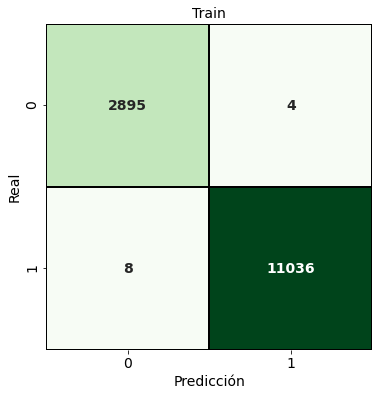

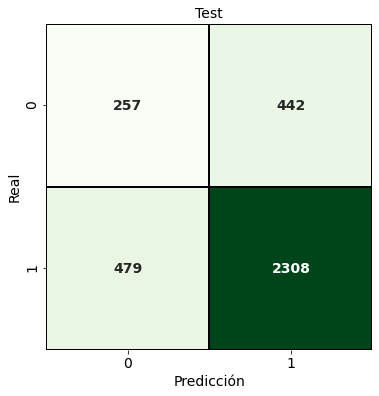

In [12]:
# Train Matriz de confusión
plot_cm(ad_train, figsize=(10,6), title='Train', cmap='Greens');

# Test Matriz de confusion
plot_cm(ad_test, figsize=(10,6), title='Test', cmap='Greens');

### Curvas ROC y Precission vs. Recall para conjuto de entrenamiento y prueba

Una herramienta de análisis complementaria, global e independiente es la [curva ROC](https://es.wikipedia.org/wiki/Curva_ROC), del Inglés Receiver Operating Characteristic, que permite comparar desempeño de diferentes modelos respecto al ideal y al peor caso de operación. En particular, se emplea el área bajo la curva (AUC) ROC como la medida cuantificada de desempeño. Algunas convensione asumen lo siguiente

|Rango del AUC| Desempeño cuantificado|
|---|---|
| \[0.5\] | Aleatorio [1]|
| \[0.5, 0.6 ) | Malo |
| \[0.6, 0.75) | Regular|
| \[0.75, 0.9) | Bueno|
| \[0.9, 0.97) | Muy bueno|
| \[0.97, 1) | Excelente|

[1]: Es como lanzar una moneda.

La curva de [precision vs. recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py) is una medida util del éxito en la predicción cuando las clases no son balanceadas. Esta curva muestra la relación de compromiso entre ámbas métricas para diferentes umbrales. Mientras mayor sea el [área debajo de la curva](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score), esto indica mayor precision y recall en donde la primera se relaciona inversamente proporcional a la tasa de falsos positivos mientras que la segunda lo hace tambien en forma inversamente proporcional con la tasa de falsos negativos.

<module 'matplotlib.pyplot' from '/home/pgianni/venv/vector/lib/python3.7/site-packages/matplotlib/pyplot.py'>

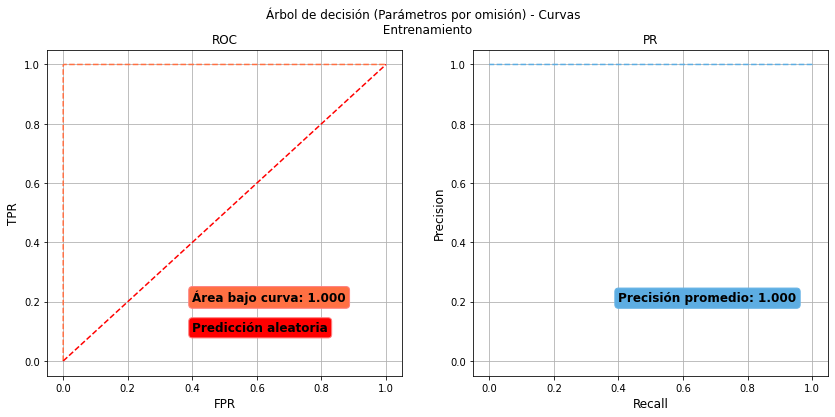

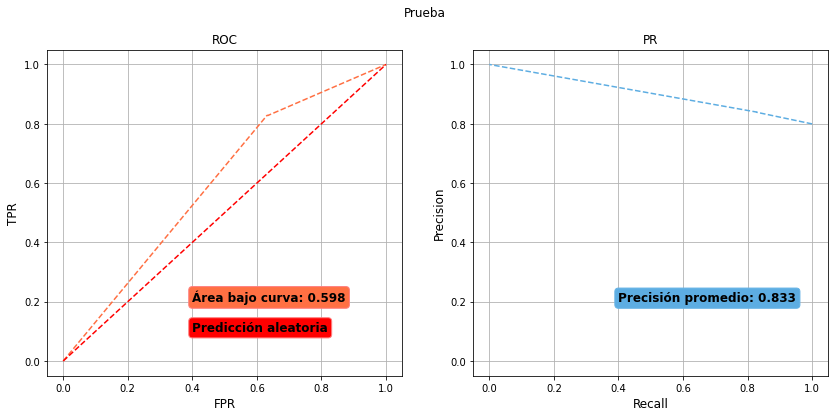

In [13]:
plot_roc_pr(y_train, y_train_pred_arbolD, y_train_pred_arbolDp[:,1], Title='Árbol de decisión (Parámetros por omisión) - Curvas \n Entrenamiento')
plot_roc_pr(y_test, y_test_pred_arbolD, y_test_pred_arbolDp[:,1], Title='Prueba')

En los gráficos de la parte superior se observa que la curva Roc con los datos de entrenamiento posee un AUC (área bajo la curva) con un valor de 1.00, es decir, se puede afirmar que el desempeño del modelo con datos de entrenamientos es el ideal dado que como es de esperar sobre ajusta sobre el conjunto de datos de entrenamiento. Mientras que con los datos de evaluación (gráfico inferior) el AUC posse un valor de  0.598 lo que representa un desempeño malo. Ambos valores de AUC fueron comparados con los valores descriptos en la  tabla de convenciones anteriormente descripta.

Por otro lado, se observa que en el gráfico de la curva precisión vs. recall (arriba a la derecha) los valores tanto de precision como recall son altos por lo que, por el contrario la tasa de falsos positivos y falsos negativos será baja. En el gráfico del mismo tipo con datos de validación se observa que la precisión y el recall disminuyen por lo que aumentará la tasa de falsos positivos y falsos negativos.

## **Ejercicio 3.2: Ajuste de Hiperparámetros**

In [14]:
arbol_decision_param = DecisionTreeClassifier(random_state= 42)

**Opciones de parámetros**

In [15]:
param_AD = [
  {'splitter': ['best'],
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(2,100,10),
          'min_samples_leaf': np.arange(1,10),
          'min_samples_split': np.arange(2,10),
          'max_features': [None, 'sqrt', 'log2']
          },
  {'splitter': ['random'],
          'criterion': ['gini', 'entropy'],
          'max_depth': list(np.arange(4,100,10))+[None],
          'min_samples_leaf': np.arange(1,10),
          'min_samples_split': np.arange(2,10)
          }
]

#### Utilizamos grid-search con 5-fold cross-validation

Se van a ralizar 5 pliegues de datos para validación cruzada y se van reportar las siguientes métricas de desempeño:

* *accuracy*
* *precision_weighted*
* *recall_weighted*
* *f1_weighted*

y se instruye a `GridSearchCV` para que utilice todos los nucleos disponibles en el procesador empleado.


In [16]:
grid_ad = GridSearchCV(arbol_decision_param, param_AD, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1, verbose=4)
grid_ad.fit(X_train, y_train);  #

Fitting 5 folds for each of 5904 candidates, totalling 29520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 2372 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 2796 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 3872 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 5148 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 6616 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8284 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12204 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 13528 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14754 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 16076 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 17498 tasks

Los resultados son formateados en un dataframe de pandas para poder encontrar las opciones más convenientes.

In [17]:
# los resultados de la búsqueda lo guardamos como dataframe
arbol_decision_param_df = pd.DataFrame(grid_ad.cv_results_) # 5904 rows × 43 columns


In [18]:
arbol_decision_param_df  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.042250,0.010354,0.013253,0.003514,gini,2,None,1,2,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
1,0.038849,0.005701,0.013782,0.002226,gini,2,None,1,3,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
2,0.038991,0.008175,0.016441,0.007673,gini,2,None,1,4,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
3,0.035525,0.002421,0.011130,0.001542,gini,2,None,1,5,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
4,0.027294,0.002081,0.008606,0.000884,gini,2,None,1,6,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,0.029589,0.002176,0.011843,0.000303,entropy,None,NaN,9,5,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345
5900,0.033004,0.001852,0.012655,0.001380,entropy,None,NaN,9,6,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345
5901,0.032779,0.002795,0.012207,0.000283,entropy,None,NaN,9,7,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345
5902,0.032859,0.000687,0.010890,0.001910,entropy,None,NaN,9,8,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345


In [19]:
# Seleccionamos las columnas que serán útiles para elegir las configuraciones con mejor performance
arbol_decision_param_df = arbol_decision_param_df[['param_criterion', 'param_max_depth',
                              'param_min_samples_leaf', 'param_splitter', 'params', 'mean_test_accuracy', 
                              'std_test_accuracy', 'rank_test_accuracy','mean_test_precision_weighted','std_test_precision_weighted',
                              'rank_test_precision_weighted', 'mean_test_recall_weighted','std_test_recall_weighted',
                               'rank_test_recall_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted']]

In [20]:
# Seleccionamos los que tienen mejores valores para acurracy, precision, recall y f1.

arbol_decision_según_accuracy = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_accuracy.idxmin()]
arbol_decision_según_precision = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_precision_weighted.idxmin()]
arbol_decision_según_recall = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_recall_weighted.idxmin()]
arbol_decision_según_f1 = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_f1_weighted.idxmin()]
#
print('-------------------------------------------------------------------------------'
      '\n Puntaje y parámetros correspondiente a los modelos con mejor performance según:'
      '\n ------------------------------------------------------------------------------'
      '\n Accuracy  {:.4f}: {}\n Precision {:.4f}: {}\n Recall    {:.4f}: {}'
      '\n F1-Score  {:.4f}: {}\n'.format(
          arbol_decision_según_accuracy.mean_test_accuracy, arbol_decision_según_accuracy.params,
          arbol_decision_según_precision.mean_test_precision_weighted, arbol_decision_según_precision.params,
          arbol_decision_según_recall.mean_test_recall_weighted, arbol_decision_según_recall.params,
          arbol_decision_según_f1.mean_test_f1_weighted, arbol_decision_según_f1.params),
      '-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
 Puntaje y parámetros correspondiente a los modelos con mejor performance según:
 ------------------------------------------------------------------------------
 Accuracy  0.8094: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
 Precision 0.8122: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 Recall    0.8094: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
 F1-Score  0.7701: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'random'}
 -------------------------------------------------------------------------------


De los cuatro modelos resultantes el primero y el tercero tienen valores similares de parámetros. Ejecutamos el algoritmo 'DecisionTreeClassifier' utilizando los parámetros obtenidos para accuracy.

In [21]:
arbol_decision_ac = DecisionTreeClassifier(**arbol_decision_según_accuracy.params, random_state= 42)

#### Entrenamiento

In [22]:
arbol_decision_ac.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

#### Predicción

In [23]:
y_train_pred_arbol_ac = arbol_decision_ac.predict(X_train)
y_train_pred_arbol_acp = arbol_decision_ac.predict_proba(X_train)

y_test_pred_arbol_ac = arbol_decision_ac.predict(X_test)
y_test_pred_arbol_acp = arbol_decision_ac.predict_proba(X_test)

#### Se imprimen las métricas de desempeño para cada modelo

* Accuracy
* Precision
* Recall
* F1-score
* Matriz de confusión

In [24]:
print('************************************************************')
ad_train = basic_metrics(y_train, y_train_pred_arbol_ac, 'Train')
print('------------------------------------------------------------')
ad_test = basic_metrics(y_test, y_test_pred_arbol_ac, 'Test')
print('------------------------------------------------------------')

************************************************************
Métricas Train:
              precision    recall  f1-score   support

           0      0.817     0.108     0.191      2899
           1      0.809     0.994     0.892     11044

    accuracy                          0.810     13943
   macro avg      0.813     0.551     0.541     13943
weighted avg      0.811     0.810     0.746     13943

Confusion Matrix: 
[[  313  2586]
 [   70 10974]]
------------------------------------------------------------
Métricas Test:
              precision    recall  f1-score   support

           0      0.784     0.083     0.150       699
           1      0.812     0.994     0.894      2787

    accuracy                          0.812      3486
   macro avg      0.798     0.539     0.522      3486
weighted avg      0.806     0.812     0.745      3486

Confusion Matrix: 
[[  58  641]
 [  16 2771]]
------------------------------------------------------------


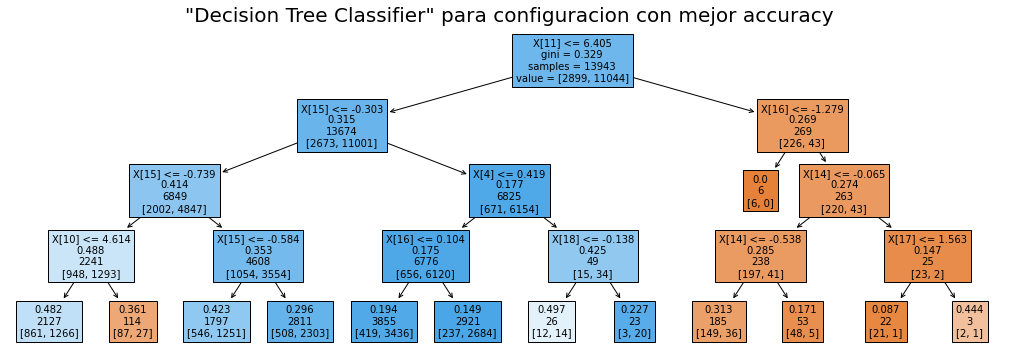

In [25]:
# arbol generado por el modelo 'arbol_decision_ac' 
plt.figure(figsize=(18,6))
plot_tree(arbol_decision_ac, filled=True, max_depth= 6, fontsize=10, label='root')
plt.title('"Decision Tree Classifier" para configuracion con mejor accuracy', size=20)
plt.show()

In [26]:

print('-----------------------------------')
print('Profundidad máxima según métrica:'
      '\n Accuracy : {}'
      .format(
          arbol_decision_ac.get_depth()
      ))
print('-----------------------------------')
print('Cantida de hojas según métrica:'
      '\n Accuracy : {}' 
      .format(
          arbol_decision_ac.get_n_leaves()
      ))
print('-----------------------------------')

-----------------------------------
Profundidad máxima según métrica:
 Accuracy : 4
-----------------------------------
Cantida de hojas según métrica:
 Accuracy : 13
-----------------------------------


#### Matriz de confusión

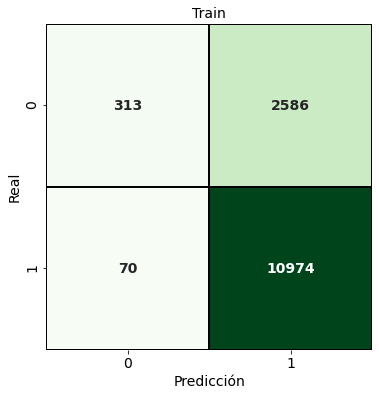

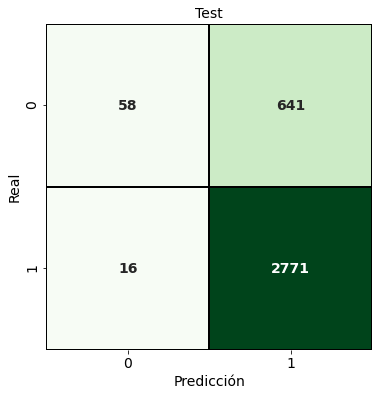

In [27]:
# Train Matriz de confusion
plot_cm(ad_train, figsize=(10,6), title='Train', cmap='Greens');

# Test Matriz de confusion
plot_cm(ad_test, figsize=(10,6), title='Test', cmap='Greens');



#### Curvas ROC y Precission vs. Recall para conjuto de entrenamiento y prueba

En comparación con los resultados obtenidos con los parámetros por defecto. Se observa una mejora considerable en el AUC como asi en la precision promedio

<module 'matplotlib.pyplot' from '/home/pgianni/venv/vector/lib/python3.7/site-packages/matplotlib/pyplot.py'>

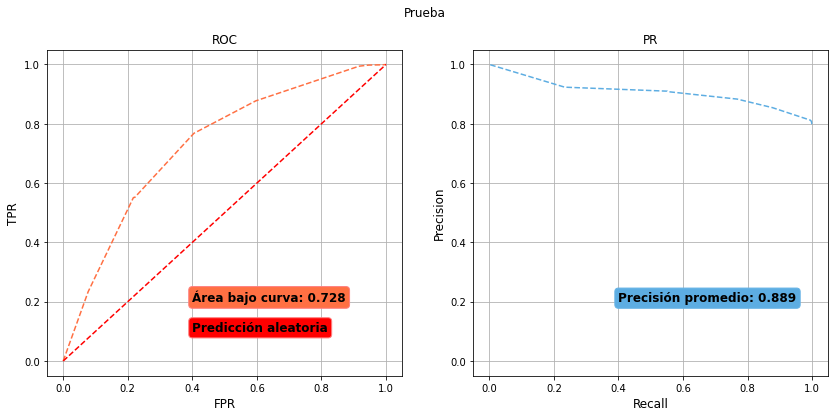

In [29]:
# plot_roc_pr(y_train, y_train_pred_arbol_ac, Title='Árbol de decisión (con parámetros) - Curvas \n Entrenamiento')
plot_roc_pr(y_test, y_test_pred_arbol_ac, y_test_pred_arbol_acp[:,1], Title='Prueba')

En los gráficos de la parte superior se observa que la curva Roc con los datos de test posee un AUC (área bajo la curva) con un valor de 0.728, es decir, se puede afirmar que el desempeño del modelo es **Regular** según los valores descriptos en la tabla de convenciones anteriormente descripta y, mejoran al modelo incial.

Por otro lado, se observa que en el gráfico de la curva precisión vs. recall los valores de recall mejoran levemente respecto al modelo incial.

## **Breve comparación entre los modelos utilizados:**

Si comparamos  los resultados obtenidos utilizando **Árboles de decisión  con parámetros por defecto y con hiperparámetros ajutados**, se observa que que la diferencia entre los casos positivos verdaderos es pequeña. Además, la profundidad del árbol pasa de 46 y una cantidad de hojas de 2581 con parámetros por defecto contra una profundidad de 4 y una cantidad de hojas de 13  con hiperparámetros. Por lo que se puede afirmar que  el modelo que ofrece mejor relación entre performance y complejidad es el modelo con hiperparámetros ajustados teniendo en cuenta que se obtienen mejores valores para las métricas como accuracy, precision, recall y f1 con mucha menor complejidad que si utilizaramos los parámetros por defecto.  

